# Візуалізація многочленів та перетворень Лаґерра

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

## Візуалізація многочленів Лаґерра

In [11]:
def plot_tabulation():
    polynomials = []
    for root, _, files in os.walk('output/polynomials'):
        for file in files:
            if file.endswith('.csv'):
                n = int(re.search(r'polynomials_n(\d+).csv', file).group(1))
                df = pd.read_csv(os.path.join(root, file))
                polynomials.append({
                    'n': n,
                    'df': df
                })

    polynomials = sorted(polynomials, key=lambda x: x['n'])

    plt.figure(figsize=(12, 8))

    for polynomial in polynomials:
        plt.plot(polynomial['df']['t'], polynomial['df']['l'], label=f'$L_{{{polynomial["n"]}}}$')

    plt.title('Многочлени Лаґерра')
    plt.xlabel('t')
    plt.ylabel('$L_n(t)$')
    plt.grid()
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(-0.2, 1)
    )
    
    plt.show()

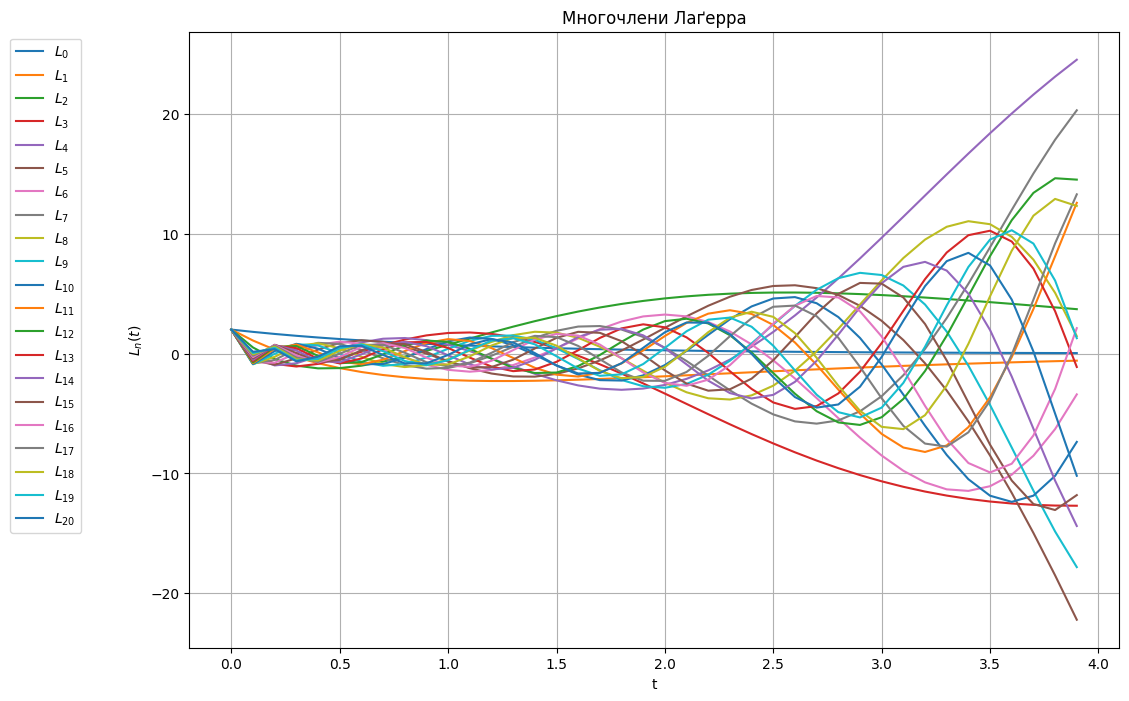

In [12]:
plot_tabulation()

## Візуалізація перетворень Лаґерра

In [13]:
def plot_transformation(function_name):
    dir = f'output/transformations/{function_name}'

    initial_function = pd.read_csv(f'{dir}/initial.csv')
    transformed_function = pd.read_csv(f'{dir}/transform.csv')
    inverse_transformed_function = pd.read_csv(f'{dir}/inverse.csv')

    metadata = pd.read_json(f'{dir}/metadata.json', typ='series')

    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(f'Графік функції \"{metadata['functionName']}\" ($\\widetilde{{f}}^N(t), t\\in[0, {metadata['maxT']}]$)')

    plt.subplot(2, 1, 1)
    plt.bar(
        transformed_function['n'],
        transformed_function['l'],
    )
    plt.title(f'Перетворення Лаґерра, N = {metadata['maxN']}')
    plt.xlabel('n')
    plt.ylabel(r'$L_{N}$')
    plt.xticks(range(0, metadata['maxN'] + 1, 1))
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(
        initial_function['t'],
        initial_function['f'],
        label='Початкова функція',
        linewidth=6,
        color='black',
        alpha=0.25
    )

    plt.plot(
        inverse_transformed_function['t'],
        inverse_transformed_function['h'],
        label='Обернене перетворення Лаґерра',
        linewidth=1,
        color='green'
    )

    plt.title('Обернене перетворення Лаґерра')
    plt.xlabel('t')
    plt.ylabel(r'$\widetilde{f}^N(t)$')
    plt.legend()
    plt.grid()

    plt.show()

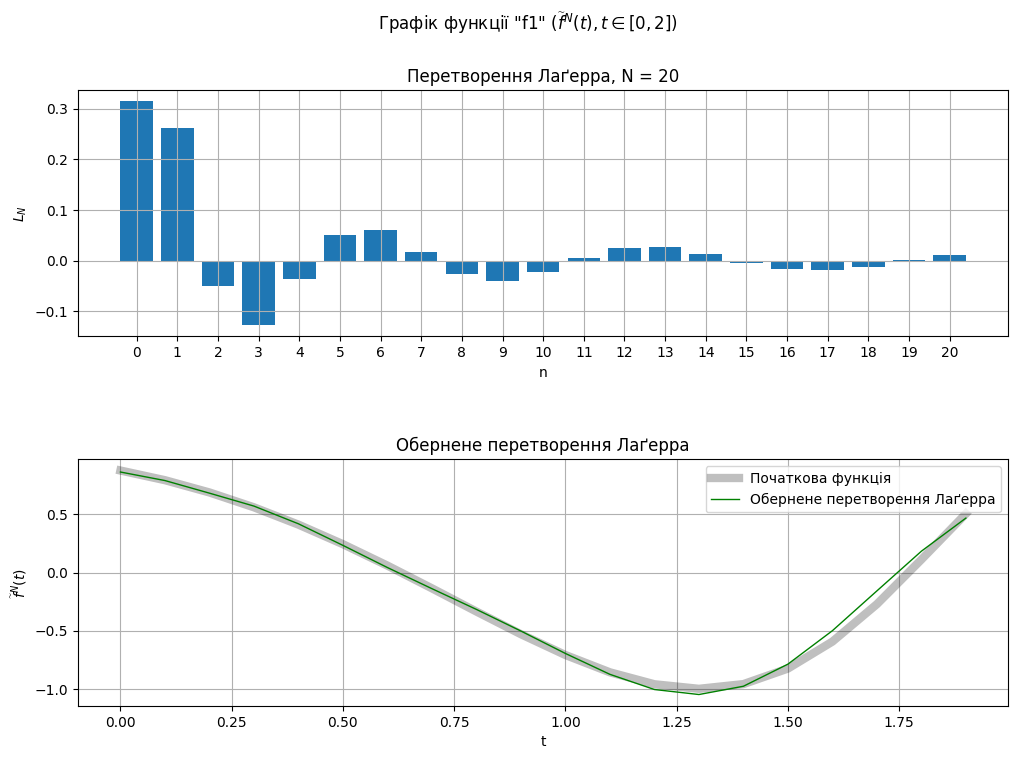

In [14]:
plot_transformation('f1')

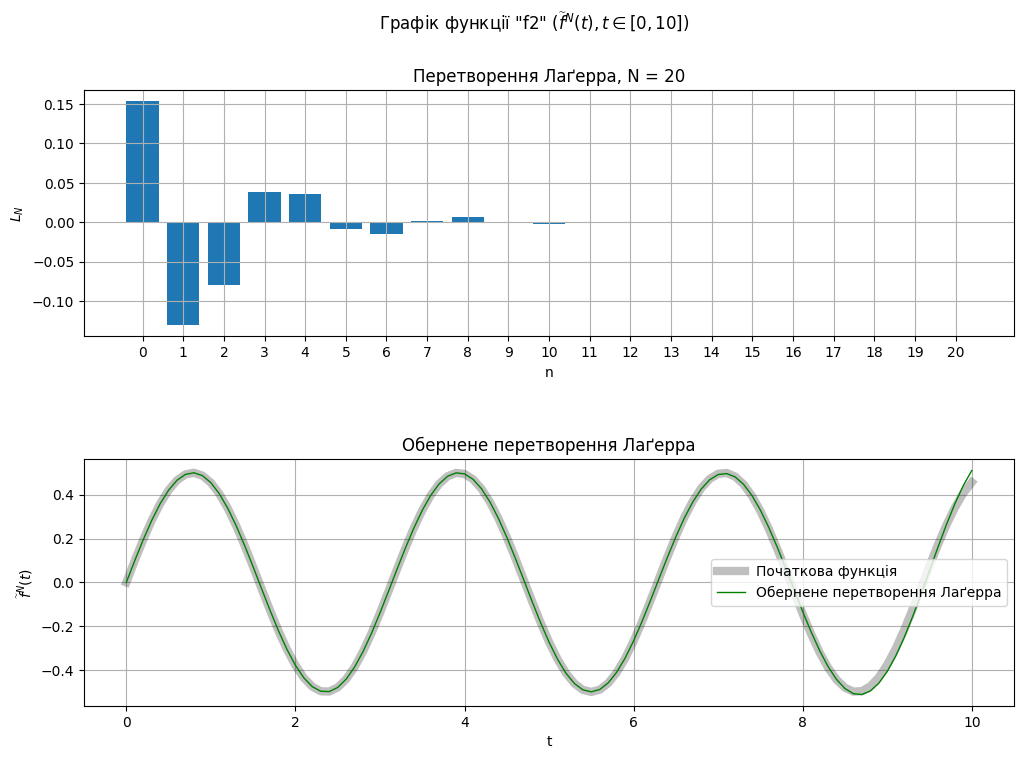

In [15]:
plot_transformation('f2')

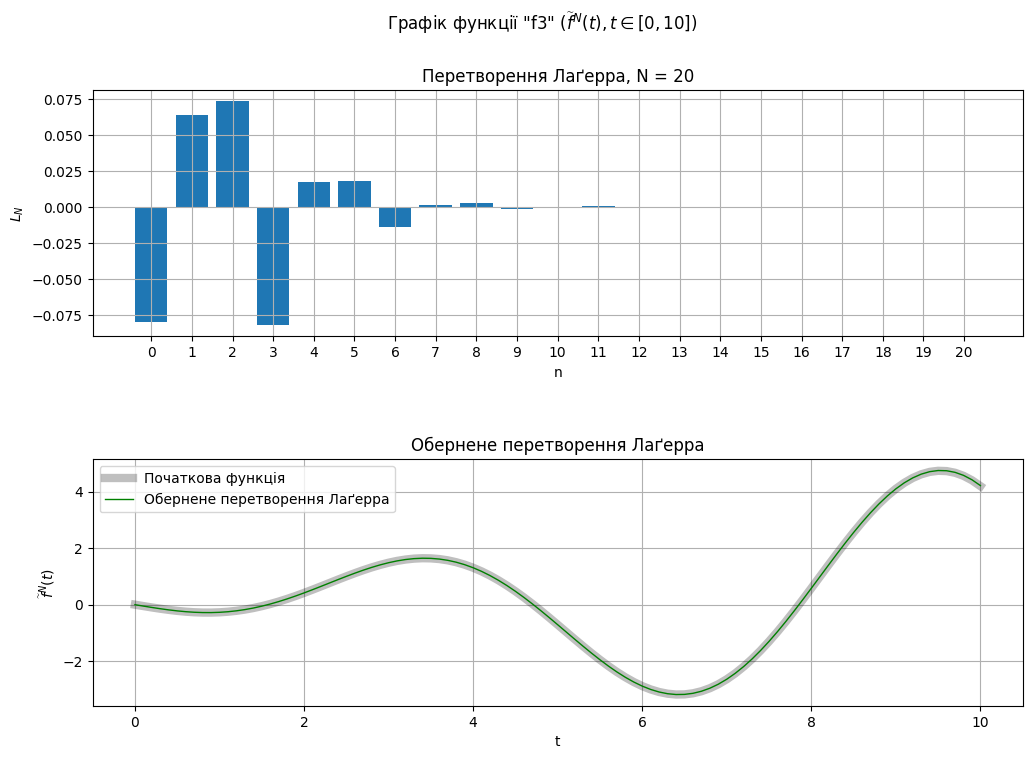

In [16]:
plot_transformation('f3')

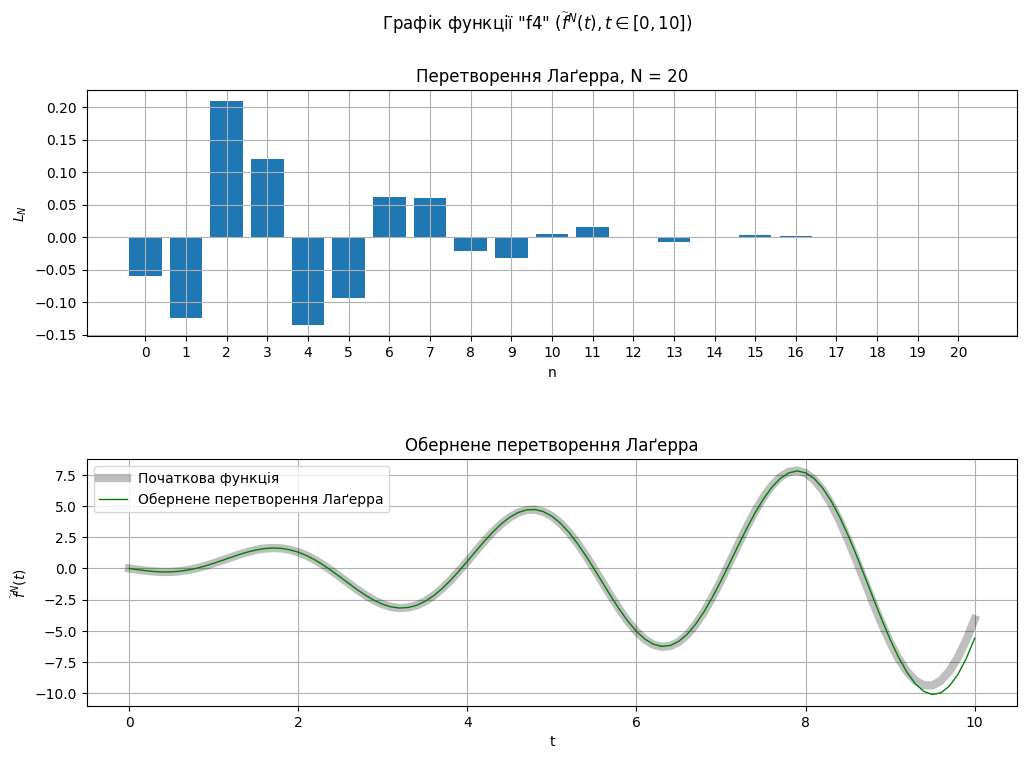

In [17]:
plot_transformation('f4')

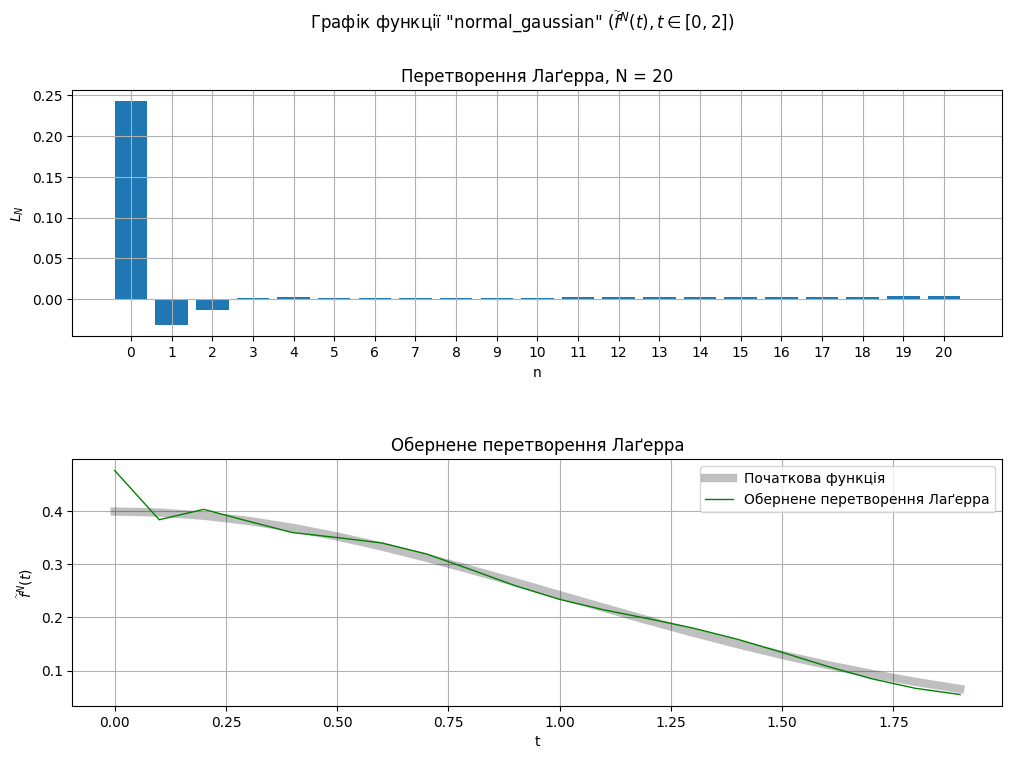

In [18]:
plot_transformation('normal_gaussian')

## Висновок

У лабораторній роботі було розглянуто використання многочленів Лаґерра у
контексті обчислення їхнього прямого та оберненого перетворення на мові пргограмування C#. Були
реалізовані функції для обчислення многочленів, їхньої табуляції,
проведення обчислювального експерименту для знаходження оптимального
значення аргументу t та обчислення перетворень.

В результаті роботи було показано, як можна використовувати многочлени
Лаґерра для перетворення функцій та як здійснювати обернене перетворення
для відновлення початкових функцій. Проведено аналіз та вивчення
залежностей між параметрами многочленів Лаґерра та їхніми властивостями.

Окремий акцент був зроблений на побудові графіків многочленів Лаґерра. Це дозволило візуально спостерігати їхні
властивості та залежність від параметрів.

Також було проведено аналіз функції f1. Для неї було побудовано
графік перетворення Лаґерра та оберненого перетворення, що дозволило
візуально спостерігати схожість графіку оберненого перетворення та
початкової функції.

Отже, лабораторна робота надала можливість здобути практичні навички
використання многочленів Лаґерра, використовуючи об'єктно-орієнтований
підхід розробки програмного забезпечення.